<a href="https://colab.research.google.com/github/chemoinformatics-lecture/lecture-beginner/blob/main/lesson04_RDKit/lecture_note_colab_RDKit_no2_Descriptors%E3%81%AE%E4%BD%BF%E3%81%84%E6%96%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#ライブラリーのインストール
!pip install rdkit
!pip install pubchempy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [2]:
import platform
# 使用しているOSを表示
platform.platform()

'Linux-5.4.188+-x86_64-with-Ubuntu-18.04-bionic'

In [3]:
# pythonのversionを表示
!python -V

Python 3.7.13


In [4]:
import pubchempy as pcp
# pcpと略すのが一般的
# pubchemのversionを表示
pcp. __version__

'1.0.4'

In [5]:
import pandas as pd
# pdと略すのが一般的
# pandasのversionを表示
pd.__version__

'1.3.5'

In [6]:
from rdkit import rdBase, Chem
from rdkit.Chem import Descriptors
from rdkit.ML.Descriptors import MoleculeDescriptors
print(rdBase.rdkitVersion)

2022.03.5


# 1つの分子に対してDescriptorで数字を表示する。

In [7]:
compoud = "quercetine"

In [8]:
# 今回はpubchemで名前からsmilesに変換してRDKitのmolファイルに変換しています。
pcp_compoud = pcp.get_compounds(compoud, 'name')
compoud_smiles = pcp_compoud[0].isomeric_smiles
mol = Chem.MolFromSmiles(compoud_smiles)
mol 

In [9]:
# Descriptorsに入っているものがList形式になっている。
len(Descriptors.descList)

208

In [10]:
#TPSAの出力
Descriptors.TPSA(mol)

131.36

In [11]:
#HBDの出力
Descriptors.NumHDonors(mol)

5

# 複数分子を読み込んだデータフレームにDescriptorを追加する。

In [12]:
from rdkit.Chem import AllChem, PandasTools

In [13]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,ID,ROMol
19,253660925,

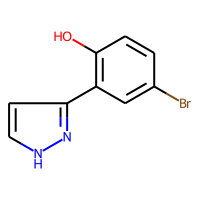

In [14]:
df = PandasTools.LoadSDF('/content/drive/MyDrive/data/PubChem_TCI_phenol_records.sdf')
df = df[['ID','ROMol']]
df.sample(1)

,ID,ROMol,TPSA,MolLogP,qed
43,87577653,,38.69,1.6914,0.731634

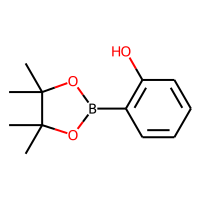

In [15]:
df["TPSA"] = df["ROMol"].map(Descriptors.TPSA)
df["MolLogP"] = df["ROMol"].map(Descriptors.MolLogP)
df["qed"] = df["ROMol"].map(Descriptors.qed)
df.sample(1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fdab8d17850>]],
      dtype=object)

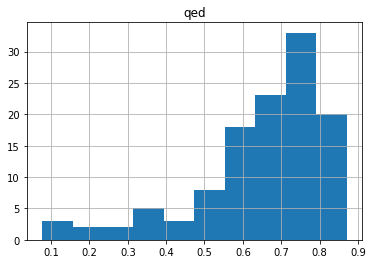

In [16]:
df.hist('qed')

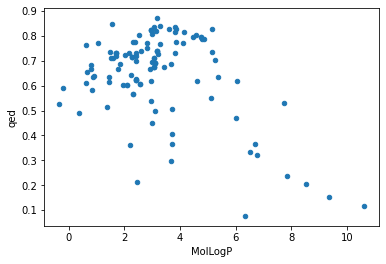

In [17]:
df.plot(kind='scatter', x='MolLogP', y='qed')

# 複数分子を読み込んだデータフレームにDescriptorを全て追加する。

In [18]:
for i, j in Descriptors.descList:
    df[i] = df["ROMol"].map(j)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


,ID,ROMol,TPSA,MolLogP,qed,MaxEStateIndex,MinEStateIndex,MaxAbsEStateIndex,MinAbsEStateIndex,MolWt,...,fr_sulfide,fr_sulfonamd,fr_sulfone,fr_term_acetylene,fr_tetrazole,fr_thiazole,fr_thiocyan,fr_thiophene,fr_unbrch_alkane,fr_urea
0,354335558,,139.48,6.3510,0.076773,10.705447,-1.117358,10.705447,0.053308,603.756,...,0,0,0,0,0,0,0,0,10,0
1,354335473,,20.23,3.0644,0.676226,11.959304,-4.419306,11.959304,0.301088,196.555,...,0,0,0,0,0,0,0,0,0,0
2,354335166,,48.39,6.0228,0.471056,10.164167,0.000000,10.164167,0.000000,428.791,...,0,0,0,0,0,0,0,0,0,0
3,354334589,,20.23,5.2463,0.703747,9.317572,0.381483,9.317572,0.381483,246.394,...,0,0,0,0,0,0,0,0,1,0
4,354334487,,35.83,7.8345,0.237704,10.621582,-0.157343,10.621582,0.032395,576.332,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,87558359,,20.23,3.0798,0.711796,9.577245,0.074745,9.577245,0.074745,164.248,...,0,0,0,0,0,0,0,0,0,0
113,87558322,,37.30,4.6309,0.618405,11.969142,-0.064760,11.969142,0.064760,280.367,...,0,0,0,0,0,0,0,0,0,0
114,87558311,,20.23,4.7674,0.795464,10.040125,0.031661,10.040125,0.031661,234.383,...,0,0,0,0,0,0,0,0,0,0
115,87558282,,20.23,1.3922,0.514730,8.632222,0.321759,8.632222,0.321759,94.113,...,0,0,0,0,0,0,0,0,0,0

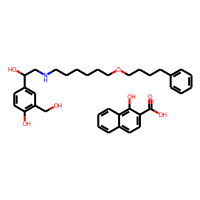
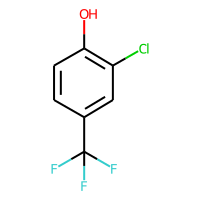
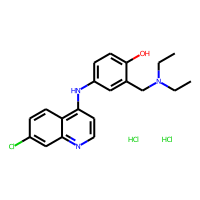
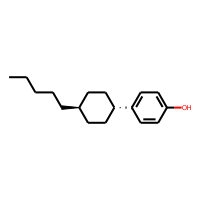
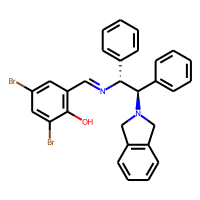
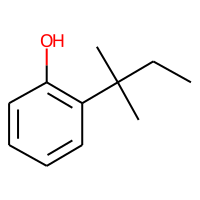
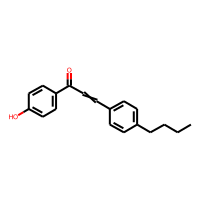
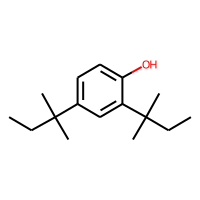
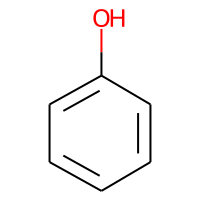
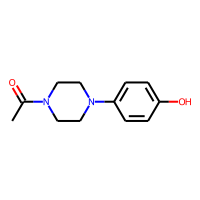

In [19]:
df

## morganfingerprintを表示

In [20]:
import numpy as np

fingerprints = []
safe = []
for mol_idx, mol in enumerate(df["ROMol"]):
    try:
        fingerprint = [x for x in AllChem.GetMorganFingerprintAsBitVect(mol, 2, 2048)]
        fingerprints.append(fingerprint)
        safe.append(mol_idx)
        
    except:
        print("Error", mol_idx)
        continue
fingerprints = np.array(fingerprints)
print(fingerprints.shape)
df_fp = pd.DataFrame(fingerprints)

(117, 2048)


In [21]:
df_fp

,0,1,2,3,4,5,6,7,8,9,...,2038,2039,2040,2041,2042,2043,2044,2045,2046,2047
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
113,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
114,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
115,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [22]:
df_fp['ID'] = df['ID']
df_fp.head()

,0,1,2,3,4,5,6,7,8,9,...,2039,2040,2041,2042,2043,2044,2045,2046,2047,ID
0,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335558
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335473
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354335166
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354334589
4,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,354334487
